In [48]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from numpy import random
from time import time
import calendar
from datetime import datetime

In [49]:
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

# For splitting dataset
from sklearn.cross_validation import ShuffleSplit, train_test_split

import sklearn.learning_curve as curves
from sklearn.learning_curve import validation_curve

# k-fold cross validation
from sklearn.cross_validation import KFold, cross_val_score

# Import sklearn models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model.stochastic_gradient import SGDRegressor

In [50]:
enet = ElasticNet(alpha=0.1, l1_ratio=0.7)
lasso = Lasso(alpha=0.1)
reg = Ridge(alpha = .5)
svr = SVR()
tree = DecisionTreeRegressor()
Forest = RandomForestRegressor(random_state = 0, max_depth = 20, n_estimators = 150)
gbr = GradientBoostingRegressor()
lr = LinearRegression()
sgd = SGDRegressor(penalty='elasticnet', alpha=0.01, l1_ratio=0.25, fit_intercept=True)

In [51]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")
train_data = train_data.drop(['TID','vendor_id','store_and_fwd_flag'], axis=1)
print (train_data.shape, test_data.shape)

(1658099, 15) (509808, 17)


In [52]:
train_data.head()

,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,surcharge,fare_amount
0,NO,0.0,1.4,0.5,2015-04-20 04:18:25,2015-04-20 04:24:20,1,-74.003939,40.742894,1,-73.993369,40.734247,CRD,0.5,8.4
1,NO,0.0,1.0,0.5,2015-04-19 18:16:07,2015-04-19 18:22:06,3,-73.973864,40.752194,1,-73.958701,40.772533,CRD,0.0,8.5
2,NO,0.0,0.0,0.5,2015-04-06 08:04:32,2015-04-06 08:10:05,2,-73.954406,40.764420,1,-73.970780,40.758350,CSH,0.0,7.0
3,NO,0.0,1.8,0.5,2015-04-10 09:48:00,2015-04-10 10:00:00,2,-73.962345,40.767215,1,-73.975512,40.756867,CRD,0.0,11.3
4,NO,0.0,0.0,0.5,2015-04-15 13:12:48,2015-04-15 13:26:30,1,-74.004657,40.707434,1,-73.999369,40.721517,CSH,0.0,10.0


In [53]:
test_data.isnull().sum()

TID                       0
vendor_id                 0
new_user                 22
tolls_amount              0
tip_amount            51310
mta_tax                   0
pickup_datetime           0
dropoff_datetime          0
passenger_count           0
pickup_longitude      15339
pickup_latitude       10095
rate_code                 0
store_and_fwd_flag        0
dropoff_longitude      1584
dropoff_latitude       2563
payment_type              0
surcharge             30727
dtype: int64

In [54]:
train_data.isnull().sum()

new_user                 19
tolls_amount              0
tip_amount           165196
mta_tax                   0
pickup_datetime           0
dropoff_datetime          0
passenger_count           0
pickup_longitude      49809
pickup_latitude       33101
rate_code                 0
dropoff_longitude      4987
dropoff_latitude       8162
payment_type              0
surcharge             99173
fare_amount               0
dtype: int64

In [55]:
train_data.new_user.value_counts()

NO     1657917
YES        163
Name: new_user, dtype: int64

In [56]:
train_data['new_user'] = train_data['new_user'].fillna('NO')
train_data['tip_amount'] = train_data['tip_amount'].fillna(train_data['tip_amount'].median())
train_data['surcharge'] = train_data['surcharge'].fillna(train_data['surcharge'].median())
train_data.isnull().sum()

new_user                 0
tolls_amount             0
tip_amount               0
mta_tax                  0
pickup_datetime          0
dropoff_datetime         0
passenger_count          0
pickup_longitude     49809
pickup_latitude      33101
rate_code                0
dropoff_longitude     4987
dropoff_latitude      8162
payment_type             0
surcharge                0
fare_amount              0
dtype: int64

In [57]:
train_data['pickup_latitude'] = train_data['pickup_latitude'].fillna(train_data['pickup_latitude'].median())
train_data['pickup_longitude'] = train_data['pickup_longitude'].fillna(train_data['pickup_longitude'].median())
train_data['dropoff_latitude'] = train_data['dropoff_latitude'].fillna(train_data['dropoff_latitude'].median())
train_data['dropoff_longitude'] = train_data['dropoff_longitude'].fillna(train_data['dropoff_longitude'].median())

In [58]:
# train_data = train_data.dropna()
print(train_data.shape)
train_data.isnull().sum()

(1658099, 15)


new_user             0
tolls_amount         0
tip_amount           0
mta_tax              0
pickup_datetime      0
dropoff_datetime     0
passenger_count      0
pickup_longitude     0
pickup_latitude      0
rate_code            0
dropoff_longitude    0
dropoff_latitude     0
payment_type         0
surcharge            0
fare_amount          0
dtype: int64

In [59]:
target_df = train_data['fare_amount']
feature_df = train_data.drop('fare_amount', axis = 1)
feature_df.head()

,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,surcharge
0,NO,0.0,1.4,0.5,2015-04-20 04:18:25,2015-04-20 04:24:20,1,-74.003939,40.742894,1,-73.993369,40.734247,CRD,0.5
1,NO,0.0,1.0,0.5,2015-04-19 18:16:07,2015-04-19 18:22:06,3,-73.973864,40.752194,1,-73.958701,40.772533,CRD,0.0
2,NO,0.0,0.0,0.5,2015-04-06 08:04:32,2015-04-06 08:10:05,2,-73.954406,40.764420,1,-73.970780,40.758350,CSH,0.0
3,NO,0.0,1.8,0.5,2015-04-10 09:48:00,2015-04-10 10:00:00,2,-73.962345,40.767215,1,-73.975512,40.756867,CRD,0.0
4,NO,0.0,0.0,0.5,2015-04-15 13:12:48,2015-04-15 13:26:30,1,-74.004657,40.707434,1,-73.999369,40.721517,CSH,0.0


In [60]:
'''df_dummy = pd.get_dummies(feature_df['new_user'])
feature_df_dummy = df_dummy.join(feature_df.drop('new_user', axis = 1))
feature_df_dummy.head()'''

feature_df['new_user'] = feature_df['new_user'].map({'NO': 0, 'YES': 1})
feature_df['payment_type'] = feature_df['payment_type'].map({'CRD': 1, 'CSH': 2,  'DIS': 3,  'NOC': 4,  'UNK': 5})
feature_df.head()

,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,surcharge
0,0,0.0,1.4,0.5,2015-04-20 04:18:25,2015-04-20 04:24:20,1,-74.003939,40.742894,1,-73.993369,40.734247,1,0.5
1,0,0.0,1.0,0.5,2015-04-19 18:16:07,2015-04-19 18:22:06,3,-73.973864,40.752194,1,-73.958701,40.772533,1,0.0
2,0,0.0,0.0,0.5,2015-04-06 08:04:32,2015-04-06 08:10:05,2,-73.954406,40.764420,1,-73.970780,40.758350,2,0.0
3,0,0.0,1.8,0.5,2015-04-10 09:48:00,2015-04-10 10:00:00,2,-73.962345,40.767215,1,-73.975512,40.756867,1,0.0
4,0,0.0,0.0,0.5,2015-04-15 13:12:48,2015-04-15 13:26:30,1,-74.004657,40.707434,1,-73.999369,40.721517,2,0.0


In [14]:
'''feature_df["date"] = feature_df.pickup_datetime.apply(lambda x : x.split()[0].split("-")[2])
feature_df["hour"] = feature_df.pickup_datetime.apply(lambda x : x.split()[1].split(":")[0])
minute_df_pickup = feature_df.pickup_datetime.apply(lambda x : int(x.split()[1].split(":")[1]))
hour_df_pickup = feature_df.pickup_datetime.apply(lambda x : int(x.split()[1].split(":")[0]) * 60)
total_pickup_df = minute_df_pickup + hour_df_pickup
minute_df_dropoff = feature_df.dropoff_datetime.apply(lambda x : int(x.split()[1].split(":")[1]))
hour_df_dropoff = feature_df.dropoff_datetime.apply(lambda x : int(x.split()[1].split(":")[0]) * 60)
total_dropoff_df = minute_df_dropoff + hour_df_dropoff
feature_df["duration"] = total_dropoff_df - total_pickup_df
feature_upg_df = feature_df.drop(['pickup_datetime', 'dropoff_datetime'], axis = 1)
feature_upg_df.head()'''

,new_user,tolls_amount,tip_amount,mta_tax,passenger_count,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,surcharge,date,hour,duration
0,0,0.0,1.4,0.5,1,-74.003939,40.742894,1,-73.993369,40.734247,1,0.5,20,04,6
1,0,0.0,1.0,0.5,3,-73.973864,40.752194,1,-73.958701,40.772533,1,0.0,19,18,6
2,0,0.0,0.0,0.5,2,-73.954406,40.764420,1,-73.970780,40.758350,2,0.0,06,08,6
3,0,0.0,1.8,0.5,2,-73.962345,40.767215,1,-73.975512,40.756867,1,0.0,10,09,12
4,0,0.0,0.0,0.5,1,-74.004657,40.707434,1,-73.999369,40.721517,2,0.0,15,13,14


In [61]:
feature_df['pickup_datetime'] = pd.to_datetime(feature_df['pickup_datetime'])
feature_df['dropoff_datetime'] = pd.to_datetime(feature_df['dropoff_datetime'])
feature_df.head()

,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,surcharge
0,0,0.0,1.4,0.5,2015-04-20 04:18:25,2015-04-20 04:24:20,1,-74.003939,40.742894,1,-73.993369,40.734247,1,0.5
1,0,0.0,1.0,0.5,2015-04-19 18:16:07,2015-04-19 18:22:06,3,-73.973864,40.752194,1,-73.958701,40.772533,1,0.0
2,0,0.0,0.0,0.5,2015-04-06 08:04:32,2015-04-06 08:10:05,2,-73.954406,40.764420,1,-73.970780,40.758350,2,0.0
3,0,0.0,1.8,0.5,2015-04-10 09:48:00,2015-04-10 10:00:00,2,-73.962345,40.767215,1,-73.975512,40.756867,1,0.0
4,0,0.0,0.0,0.5,2015-04-15 13:12:48,2015-04-15 13:26:30,1,-74.004657,40.707434,1,-73.999369,40.721517,2,0.0


In [64]:
def cal_duration(start, end):
    c = end - start
    d = divmod(c.days * 86400 + c.seconds, 60)
    return abs(d[0])

feature_df["duration"] = feature_df.apply(lambda x : cal_duration(x['pickup_datetime'], x['dropoff_datetime']), axis=1)
feature_upg_df = feature_df.drop(['pickup_datetime', 'dropoff_datetime'], axis = 1)
feature_upg_df.head()

,new_user,tolls_amount,tip_amount,mta_tax,passenger_count,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,surcharge,duration
0,0,0.0,1.4,0.5,1,-74.003939,40.742894,1,-73.993369,40.734247,1,0.5,5
1,0,0.0,1.0,0.5,3,-73.973864,40.752194,1,-73.958701,40.772533,1,0.0,5
2,0,0.0,0.0,0.5,2,-73.954406,40.764420,1,-73.970780,40.758350,2,0.0,5
3,0,0.0,1.8,0.5,2,-73.962345,40.767215,1,-73.975512,40.756867,1,0.0,12
4,0,0.0,0.0,0.5,1,-74.004657,40.707434,1,-73.999369,40.721517,2,0.0,13


In [65]:
feature_upg_df['duration'].between(-50, -1).any()

False

In [66]:
from geopy.distance import vincenty
def measure_distance(newport_ri, cleveland_oh):
    return vincenty(newport_ri, cleveland_oh).miles

feature_upg_df['distance'] = feature_upg_df.apply(lambda row: measure_distance((float(row['dropoff_latitude']), float(row['dropoff_longitude'])), (float(row['pickup_latitude']), float(row['pickup_longitude']))), axis=1)
feature_upg_df.head()

,new_user,tolls_amount,tip_amount,mta_tax,passenger_count,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,surcharge,duration,distance
0,0,0.0,1.4,0.5,1,-74.003939,40.742894,1,-73.993369,40.734247,1,0.5,5,0.814725
1,0,0.0,1.0,0.5,3,-73.973864,40.752194,1,-73.958701,40.772533,1,0.0,5,1.613248
2,0,0.0,0.0,0.5,2,-73.954406,40.764420,1,-73.970780,40.758350,2,0.0,5,0.955764
3,0,0.0,1.8,0.5,2,-73.962345,40.767215,1,-73.975512,40.756867,1,0.0,12,0.993529
4,0,0.0,0.0,0.5,1,-74.004657,40.707434,1,-73.999369,40.721517,2,0.0,13,1.010644


In [67]:
feature_upg_df['distance'].between(-50, -1).any()

False

In [ ]:
'''import re
from datetime import datetime, timedelta
def cal_duration(start, end):
    start_lst = re.split('-|:| ',start)
    start_lst = [int(x) for x in start_lst]
    end_lst = re.split('-|:| ',start)
    end_lst = [int(x) for x in end_lst]
    d1 = datetime(start_lst[0], start_lst[1], start_lst[2], start_lst[3], start_lst[4], start_lst[5])
    d2 = datetime(end_lst[0], end_lst[1], end_lst[2], end_lst[3], end_lst[4], end_lst[5])
    # print(d2, d1)
    c = d2 - d1
    c = divmod(c.days * 86400 + c.seconds, 60)
    return c[0]

feature_df["duration"] = feature_df.apply(lambda x : cal_duration(x['pickup_datetime'], x['dropoff_datetime']), axis=1)
#feature_upg_df = feature_df.drop(['pickup_datetime', 'dropoff_datetime'], axis = 1)
feature_df.head()'''

In [68]:
feature_upg_all_df = feature_upg_df.drop(['dropoff_longitude', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude'], axis = 1)
feature_upg_all_df.head()

,new_user,tolls_amount,tip_amount,mta_tax,passenger_count,rate_code,payment_type,surcharge,duration,distance
0,0,0.0,1.4,0.5,1,1,1,0.5,5,0.814725
1,0,0.0,1.0,0.5,3,1,1,0.0,5,1.613248
2,0,0.0,0.0,0.5,2,1,2,0.0,5,0.955764
3,0,0.0,1.8,0.5,2,1,1,0.0,12,0.993529
4,0,0.0,0.0,0.5,1,1,2,0.0,13,1.010644


In [81]:
'''from math import sin, cos
pick_lan_sin_df = feature_upg_df.pickup_latitude.apply(lambda x : sin(float(x)))
pick_long_sin_df = feature_upg_df.pickup_longitude.apply(lambda x : sin(float(x)))
drop_lan_sin_df = feature_upg_df.dropoff_latitude.apply(lambda x : sin(float(x)))
drop_long_sin_df = feature_upg_df.dropoff_longitude.apply(lambda x : sin(float(x)))

pick_lan_cos_df = feature_upg_df.pickup_latitude.apply(lambda x : cos(float(x)))
pick_long_cos_df = feature_upg_df.pickup_longitude.apply(lambda x : cos(float(x)))
drop_lan_cos_df = feature_upg_df.dropoff_latitude.apply(lambda x : cos(float(x)))
drop_long_cos_df = feature_upg_df.dropoff_longitude.apply(lambda x : cos(float(x)))

x_pick = pick_lan_cos_df * pick_long_cos_df
y_pick = pick_lan_cos_df * pick_long_sin_df
z_pick = pick_lan_sin_df

x_drop = drop_lan_cos_df * drop_long_cos_df
y_drop = drop_lan_cos_df * drop_long_sin_df
z_drop = drop_lan_sin_df

feature_upg_df['x_pick'] = x_pick
feature_upg_df['y_pick'] = y_pick
feature_upg_df['z_pick'] = z_pick

feature_upg_df['x_drop'] = x_drop
feature_upg_df['y_drop'] = y_drop
feature_upg_df['z_drop'] = z_drop

feature_upg_all_df = feature_upg_df.drop(['dropoff_longitude', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude'], axis = 1)
feature_upg_all_df.head()'''

,new_user,tolls_amount,tip_amount,mta_tax,passenger_count,rate_code,payment_type,surcharge,date,hour,duration,x_pick,y_pick,z_pick,x_drop,y_drop,z_drop
0,0.0,0.0,1.4,0.5,1,1,1,0.5,20,04,6,-0.174757,-0.979757,0.097655,-0.164246,-0.980680,0.106257
1,0.0,0.0,1.0,0.5,3,1,1,0.0,19,18,6,-0.145343,-0.985425,0.088395,-0.130593,-0.989093,0.068119
2,0.0,0.0,0.0,0.5,2,1,2,0.0,06,08,6,-0.126269,-0.989064,0.076211,-0.142378,-0.986388,0.082261
3,0.0,0.0,1.8,0.5,2,1,1,0.0,10,09,12,-0.134146,-0.988238,0.073423,-0.147026,-0.985582,0.083739
4,0.0,0.0,0.0,0.5,1,1,2,0.0,15,13,14,-0.174740,-0.975607,0.132876,-0.169882,-0.978265,0.118906


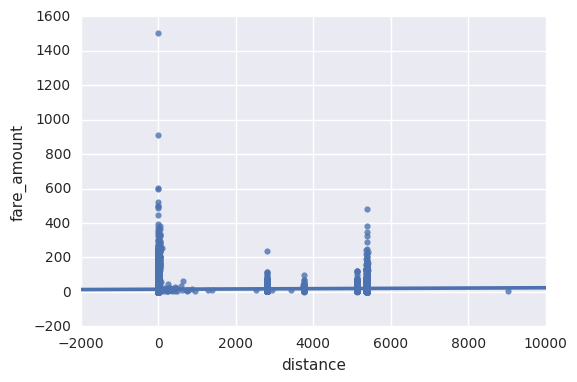

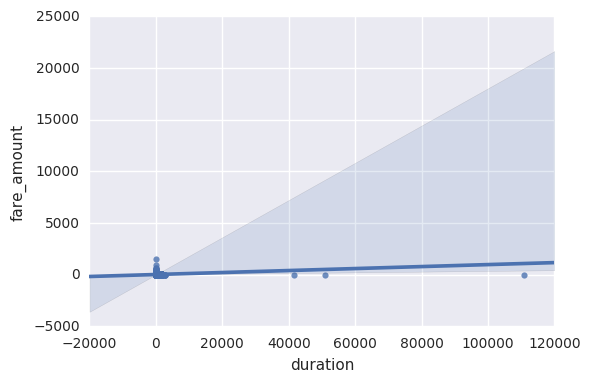

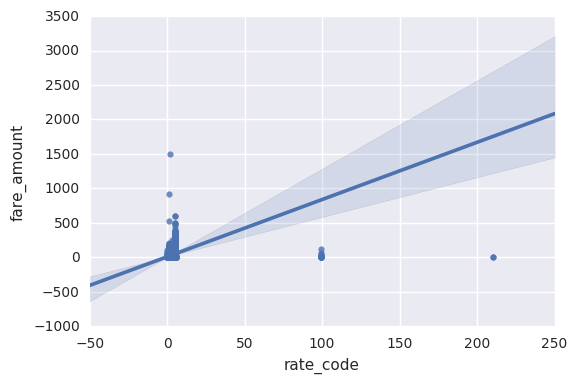

In [82]:
for var in ['distance', 'duration', 'rate_code']:
    sns.regplot(feature_upg_all_df[var], target_df)
    plt.show()

In [69]:
feature_upg_all_df.corr(method = 'pearson')

,new_user,tolls_amount,tip_amount,mta_tax,passenger_count,rate_code,payment_type,surcharge,duration,distance
new_user,1.000000,-0.002182,-0.006251,-0.304061,0.003085,0.005214,0.046354,-0.016369,-0.000785,0.012549
tolls_amount,-0.002182,1.000000,0.264258,-0.192095,0.006428,0.161586,-0.028747,-0.047873,0.028416,0.008072
tip_amount,-0.006251,0.264258,1.000000,-0.142412,-0.007607,0.156918,-0.455294,-0.016381,0.040659,0.008850
mta_tax,-0.304061,-0.192095,-0.142412,1.000000,0.008690,-0.389590,-0.002352,0.040229,-0.004860,-0.038982
passenger_count,0.003085,0.006428,-0.007607,0.008690,1.000000,-0.006004,0.018810,0.006708,0.002233,-0.009727
rate_code,0.005214,0.161586,0.156918,-0.389590,-0.006004,1.000000,-0.011275,-0.057334,0.013469,0.043567
payment_type,0.046354,-0.028747,-0.455294,-0.002352,0.018810,-0.011275,1.000000,-0.016649,-0.006134,0.013995
surcharge,-0.016369,-0.047873,-0.016381,0.040229,0.006708,-0.057334,-0.016649,1.000000,-0.006104,-0.003887
duration,-0.000785,0.028416,0.040659,-0.004860,0.002233,0.013469,-0.006134,-0.006104,1.000000,-0.001812
distance,0.012549,0.008072,0.008850,-0.038982,-0.009727,0.043567,0.013995,-0.003887,-0.001812,1.000000


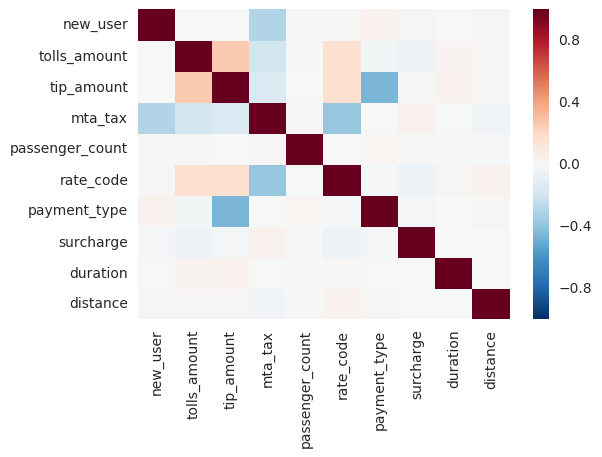

In [70]:
corr = feature_upg_all_df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [71]:
feature_upg_all_df.isnull().sum()

new_user           0
tolls_amount       0
tip_amount         0
mta_tax            0
passenger_count    0
rate_code          0
payment_type       0
surcharge          0
duration           0
distance           0
dtype: int64

In [72]:
def train_and_predict_model(model, model_name, feature_upg_all_df, target_df, selected_cols):
    X_train, X_test, y_train, y_test = train_test_split(feature_upg_all_df, target_df, test_size= 0.3,random_state=42)
    t0 = time()
    model.fit(X_train, y_train)
    train_time = time() - t0
    
    t1 = time()
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    predict_time = time() - t1
    
    train_score = r2_score(y_train, train_pred)
    
    test_score = r2_score(y_test, test_pred)
    
    mean_absolute_error_score = mean_absolute_error(y_test, test_pred)
    
    print ("r2_score of training set of {} is {}".format(model_name, train_score))
    print ("r2_score of testing set of {} is {}".format(model_name, test_score))
    print ("mean absolute error of {} is {}".format(model_name, mean_absolute_error_score))
    # print ("cross_val_score of {} is {}".format(model_name, cross_val_score(model, X_train, y_train , cv = 10).mean()))
    
    print ("Time taken to train {} is {}".format(model_name, train_time))
    print ("Time taken to predict {} is {}".format(model_name, predict_time))
    return model

In [87]:
total_features = list(feature_upg_all_df.columns)
print (total_features)
#selected_features = ['hour', 'temp', 'workingday']
model = train_and_predict_model(Forest, 'Forest', feature_upg_all_df, target_df, total_features)

['new_user', 'tolls_amount', 'tip_amount', 'mta_tax', 'passenger_count', 'rate_code', 'payment_type', 'surcharge', 'duration', 'distance']
r2_score of training set of Forest is 0.9825940950442668
r2_score of testing set of Forest is 0.9526611622871878
mean absolute error of Forest is 0.8160654245087424
Time taken to train Forest is 537.1816849708557
Time taken to predict Forest is 63.2561354637146


In [74]:
def draw_feature_imp(model, features):
    from matplotlib import pyplot
    importance = model.feature_importances_
    names = list(features)
    pyplot.bar(range(len(importance)), importance)
    print (sorted(zip(map(lambda x: round(x, 4), importance), names), 
                 reverse=True))
    pyplot.show()

[(0.53790000000000004, 'distance'), (0.1736, 'duration'), (0.14630000000000001, 'rate_code'), (0.099699999999999997, 'tip_amount'), (0.032199999999999999, 'tolls_amount'), (0.0053, 'payment_type'), (0.0022000000000000001, 'passenger_count'), (0.0018, 'surcharge'), (0.00089999999999999998, 'mta_tax'), (0.0001, 'new_user')]


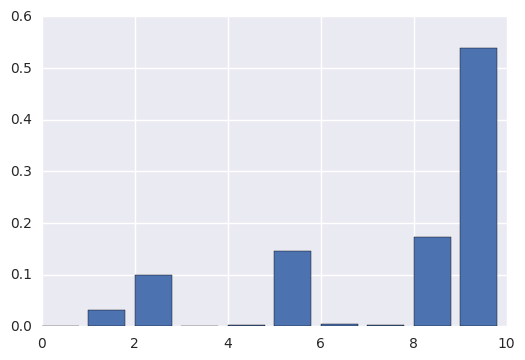

In [75]:
draw_feature_imp(model, total_features)

In [79]:
import transform_data
test_data_df = test_data.drop(['TID','vendor_id','store_and_fwd_flag'], axis=1)
test_df = transform_data.handle_na(test_data_df)
test_na_df = transform_data.handle_loc_na(test_df)
test_feature_df = transform_data.handle_catogary_data(test_na_df)
test_feature_time_df = transform_data.handle_time_data(test_feature_df)
test_feature_upg_df = transform_data.cal_dist(test_feature_time_df)
test_feature_upg_df.head()

,new_user,tolls_amount,tip_amount,mta_tax,passenger_count,rate_code,payment_type,surcharge,duration,distance
0,0,0.0,0.00,0.5,1,1,2,0.0,3,0.391797
1,0,0.0,1.26,0.5,2,1,1,0.5,4,0.558196
2,0,0.0,0.00,0.5,6,1,2,0.0,12,1.336375
3,0,0.0,0.00,0.5,4,1,2,0.5,25,2.505441
4,0,0.0,0.00,0.5,1,1,2,0.0,18,2.458822


In [86]:
from sklearn.preprocessing import MinMaxScaler
scaled_features = MinMaxScaler().fit_transform(feature_upg_all_df)
scaled_test_features = MinMaxScaler().fit_transform(test_feature_upg_df)
scaled_model = train_and_predict_model(Forest, 'Forest', scaled_features, target_df, total_features)

r2_score of training set of Forest is 0.9799266525575012
r2_score of testing set of Forest is 0.9541878714734237
mean absolute error of Forest is 0.8194100955707808
Time taken to train Forest is 481.6400218009949
Time taken to predict Forest is 59.31091809272766


In [76]:
for clf, name in [(tree, 'DecisionTree'),
                  (lr, 'LinearRegression'),
                  (gbr, 'GradientBoostingRegressor'),
                  (sgd, 'SGD Regressor'),
                 (enet, 'ElasticNet'),
                 (lasso, 'Lasso')]:
    print ("---------------------------------------------------------------------")
    train_and_predict_model(clf, name, feature_upg_all_df, target_df, total_features)

---------------------------------------------------------------------
r2_score of training set of DecisionTree is 0.9946614233369465
r2_score of testing set of DecisionTree is 0.9208058384904543
mean absolute error of DecisionTree is 1.0813335165467146
Time taken to train DecisionTree is 6.798158407211304
Time taken to predict DecisionTree is 1.0952184200286865
---------------------------------------------------------------------
r2_score of training set of LinearRegression is 0.5946482021372201
r2_score of testing set of LinearRegression is 0.5222940843402593
mean absolute error of LinearRegression is 4.855450339599689
Time taken to train LinearRegression is 0.487668514251709
Time taken to predict LinearRegression is 0.0765378475189209
---------------------------------------------------------------------
r2_score of training set of GradientBoostingRegressor is 0.9471052292636115
r2_score of testing set of GradientBoostingRegressor is 0.9428558509033204
mean absolute error of GradientB

In [88]:
test_data.new_user.value_counts()

NO     509611
YES       175
Name: new_user, dtype: int64

In [89]:
test_pred = model.predict(test_feature_upg_df)

In [90]:
test_pred

array([  4.93402167,   7.56213642,  10.365349  , ...,  13.56478661,
        19.55700764,  10.27746403])

In [91]:
test_data.head()

,TID,vendor_id,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,surcharge
0,AJX000119871,DST000481,NO,0.0,0.00,0.5,2016-05-14 13:42:33,2016-05-14 13:45:43,1,-73.971794,40.797230,1,Y,-73.972488,40.791576,CSH,0.0
1,AJX000119872,DST000543,NO,0.0,1.26,0.5,2016-05-04 01:24:39,2016-05-04 01:29:21,2,-73.992210,40.713123,1,,-73.987244,40.720276,CRD,0.5
2,AJX000119873,DST000543,NO,0.0,0.00,0.5,2016-05-28 15:12:21,2016-05-28 15:25:02,6,-73.991753,40.744305,1,N,-73.979828,40.761417,CSH,0.0
3,AJX000119874,DST000543,NO,0.0,0.00,0.5,2016-05-02 21:08:40,2016-05-02 21:34:24,4,-73.957588,40.717602,1,N,-73.919868,40.695366,CSH,0.5
4,AJX000119875,DST000543,NO,0.0,0.00,0.5,2016-05-09 17:00:33,2016-05-09 17:18:45,1,-73.970985,40.763931,1,N,-73.991409,40.731861,CSH,0.0


In [94]:
test_data['fare_amount'] = test_pred
sub_df = test_data[['TID', 'fare_amount']]
sub_df.to_csv('submission1.csv', index = False)
sub_df.head()

,TID,fare_amount
0,AJX000119871,4.934022
1,AJX000119872,7.562136
2,AJX000119873,10.365349
3,AJX000119874,19.254531
4,AJX000119875,15.040844
